## Exercise Overview
In this exercise we will play with Spark [Datasets & Dataframes](https://spark.apache.org/docs/latest/sql-programming-guide.html#datasets-and-dataframes), some [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), and build a couple of binary classifiaction models using [Spark ML](https://spark.apache.org/docs/latest/ml-guide.html) (with some [MLlib](https://spark.apache.org/mllib/) too). 
<br><br>
The set up and approach will not be too dissimilar to the standard type of approach you might do in [Sklearn](http://scikit-learn.org/stable/index.html). Spark has matured to the stage now where for 90% of what you need to do (when analysing tabular data) should be possible with Spark dataframes, SQL, and ML libraries. This is where this exercise is mainly trying to focus.  
<br>
Feel free to adapt this exercise to play with other datasets readily availabe in the Databricks enviornment (they are listed in a cell below). 

##### Getting Started
To get started you will need to create and attach a databricks spark cluster to this notebook. This notebook was developed on a cluster created with: 
- Databricks Runtime Version 4.0 (includes Apache Spark 2.3.0, Scala 2.11)
- Python Version 3

##### Links & References

Some useful links and references of sources used in creating this exercise:

**Note**: Right click and open as new tab!
<br>
1. [Latest Spark Docs](https://spark.apache.org/docs/latest/index.html)
1. [Databricks Homepage](https://databricks.com/)
1. [Databricks Community Edition FAQ](https://databricks.com/product/faq/community-edition)
1. [Databricks Self Paced Training](https://databricks.com/training-overview/training-self-paced)
1. [Databricks Notebook Guide](https://docs.databricks.com/user-guide/notebooks/index.html)
1. [Databricks Binary Classification Tutorial](https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html#binary-classification)

#### Get Data

Here we will pull in some sample data that is already pre-loaded onto all databricks clusters.

Feel free to adapt this notebook later to play around with a different dataset if you like (all available are listed in a cell below).

In [0]:
# display datasets already in databricks
display(dbutils.fs.ls("/databricks-datasets"))

path,name,size
dbfs:/databricks-datasets/,databricks-datasets/,0
dbfs:/databricks-datasets/COVID/,COVID/,0
dbfs:/databricks-datasets/README.md,README.md,976
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359
dbfs:/databricks-datasets/adult/,adult/,0
dbfs:/databricks-datasets/airlines/,airlines/,0
dbfs:/databricks-datasets/amazon/,amazon/,0
dbfs:/databricks-datasets/asa/,asa/,0
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0


Lets take a look at the '**adult**' dataset on the filesystem. This is the typical US Census data you often see online in tutorials. [Here](https://archive.ics.uci.edu/ml/datasets/adult) is the same data in the UCI repository.

_As an aside: [here](https://github.com/GoogleCloudPlatform/cloudml-samples/tree/master/census) this same dataset is used as a quickstart example for Google CLoud ML & Tensorflow Estimator API (in case youd be interested in playing with tensorflow on the same dataset as here)._

In [0]:
%fs ls databricks-datasets/adult/adult.data

path,name,size
dbfs:/databricks-datasets/adult/adult.data,adult.data,3974305


**Note**: Above  %fs is just some file system cell magic that is specific to databricks. More info [here](https://docs.databricks.com/user-guide/notebooks/index.html#mix-languages).

#### Spark SQL

Below we will use Spark SQL to load in the data and then register it as a Dataframe aswell. So the end result will be a Spark SQL table called _adult_ and a Spark Dataframe called _df_adult_. 
<br><br>
This is an example of the flexibility in Spark in that you could do lots of you ETL and data wrangling using either Spark SQL or Dataframes and pyspark. Most of the time it's a case of using whatever you are most comfortable with.
<br><br>
When you get more advanced then you might looking the pro's and con's of each and when you might favour one or the other (or operating direclty on RDD's), [here](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html) is a good article on the issues. For now, no need to overthink it!

###### create table

In [0]:
%sql 
-- drop the table if it already exists
DROP TABLE IF EXISTS adult

In [0]:
%sql
-- create a new table in Spark SQL from the datasets already loaded in the underlying filesystem.
-- In the real world you might be pointing at a file on HDFS or a hive table etc. 
CREATE TABLE adult (
  age DOUBLE,
  workclass STRING,
  fnlwgt DOUBLE,
  education STRING,
  education_num DOUBLE,
  marital_status STRING,
  occupation STRING,
  relationship STRING,
  race STRING,
  sex STRING,
  capital_gain DOUBLE,
  capital_loss DOUBLE,
  hours_per_week DOUBLE,
  native_country STRING,
  income STRING)
USING com.databricks.spark.csv
OPTIONS (path "/databricks-datasets/adult/adult.data", header "true")

###### investigate table

In [0]:
%sql
SELECT COUNT(*) FROM adult

count(1)
32560


In [0]:
%sql
DESCRIBE TABLE adult

col_name,data_type,comment
age,double,null
workclass,string,null
fnlwgt,double,null
education,string,null
education_num,double,null
marital_status,string,null
occupation,string,null
relationship,string,null
race,string,null
sex,string,null


In [0]:
# look at the data
spark.sql("SELECT * FROM adult LIMIT 5").show() 

+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
 age| workclass| fnlwgt| education|education_num| marital_status| occupation| relationship| race| sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
50.0| Self-emp-not-inc| 83311.0| Bachelors| 13.0| Married-civ-spouse| Exec-managerial| Husband| White| Male| 0.0| 0.0| 13.0| United-States| <=50K|
38.0| Private|215646.0| HS-grad| 9.0| Divorced| Handlers-cleaners| Not-in-family| White| Male| 0.0| 0.0| 40.0| United-States| <=50K|
53.0| Private|234721.0| 11th| 7.0| Married-civ-spouse| Handlers-cleaners| Husband| Black| Male| 0.0| 0.0| 40.0| United-States| <=50K|
28.0| Private|338409.0| Bachelors| 13.0| Married-civ-spouse| Prof-specialty| Wife| Black| Female| 0.0| 0.0| 40.0| Cuba| <=50K|
37.0| Private|284582.0| Masters| 14.0| Married-civ-spouse| Exec-managerial| Wife| White| Female| 0.0| 0.0| 40.0| United-States| <=50K|
+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+

In [0]:
# this will look prettier in Databricks if you use display() instead
display(spark.sql("SELECT * FROM adult LIMIT 5"))

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


If you are more comfortable with SQL then as you can see below, its very easy to just get going with writing standard SQL type code to analyse your data, do data wrangling and create new dataframes.

###### investigate `marital_status` column   
`LTRIM` removes leading space; `RTRIM` removes trailing

In [0]:
%sql
SELECT DISTINCT marital_status
FROM adult

marital_status
Widowed
Married-spouse-absent
Married-AF-spouse
Married-civ-spouse
Divorced
Never-married
Separated


In [0]:
%sql
SELECT
  LTRIM('   Married-spouse-absent') as new_string1,
  lower('Divorced') as new_string2

new_string1,new_string2
Married-spouse-absent,divorced


###### investigate `occupation` column

In [0]:
%sql
SELECT DISTINCT occupation
FROM adult

occupation
Farming-fishing
Handlers-cleaners
Prof-specialty
Adm-clerical
Exec-managerial
Craft-repair
Sales
?
Tech-support
Transport-moving


###### investigate `education` column

In [0]:
%sql
SELECT DISTINCT education
FROM adult

education
Prof-school
10th
7th-8th
5th-6th
Assoc-acdm
Assoc-voc
Masters
12th
Preschool
9th


###### summarize marital status

In [0]:
# Lets get some summary marital status rates by occupation
result = spark.sql(
  """
  SELECT 
    occupation,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) LIKE 'Married-%',1,0)),2) as married_rate,
    ROUND(AVG(if(lower(marital_status) LIKE '%widow%',1,0)),2) as widow_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Divorced',1,0)),2) as divorce_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Separated',1,0)),2) as separated_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY n DESC
  """)
display(result)

occupation,n,married_rate,widow_rate,divorce_rate,separated_rate,bachelor_rate
Prof-specialty,4140,0.53,0.02,0.13,0.02,0.3
Craft-repair,4099,0.64,0.01,0.11,0.03,0.21
Exec-managerial,4066,0.61,0.02,0.15,0.02,0.2
Adm-clerical,3769,0.28,0.04,0.22,0.04,0.42
Sales,3650,0.47,0.03,0.12,0.03,0.36
Other-service,3295,0.24,0.05,0.15,0.06,0.5
Machine-op-inspct,2002,0.51,0.03,0.14,0.04,0.29
?,1843,0.36,0.08,0.1,0.04,0.42
Transport-moving,1597,0.63,0.02,0.11,0.02,0.21
Handlers-cleaners,1370,0.36,0.01,0.09,0.03,0.51


###### register dataframe as SQL table

You can easily register dataframes as a table for Spark SQL too. So this way you can easily move between Dataframes and Spark SQL for whatever reason.

In [0]:
# register the df we just made as a table for spark sql
sqlContext.registerDataFrameAsTable(result, "result")
spark.sql("SELECT * FROM result").show(5)

+----------------+----+------------+----------+------------+--------------+-------------+
 occupation| n|married_rate|widow_rate|divorce_rate|separated_rate|bachelor_rate|
+----------------+----+------------+----------+------------+--------------+-------------+
 Prof-specialty|4140| 0.53| 0.02| 0.13| 0.02| 0.3|
 Craft-repair|4099| 0.64| 0.01| 0.11| 0.03| 0.21|
 Exec-managerial|4066| 0.61| 0.02| 0.15| 0.02| 0.2|
 Adm-clerical|3769| 0.28| 0.04| 0.22| 0.04| 0.42|
 Sales|3650| 0.47| 0.03| 0.12| 0.03| 0.36|
+----------------+----+------------+----------+------------+--------------+-------------+
only showing top 5 rows

#### Question 1: SQL query

1. Write some spark sql to get the top 'bachelor_rate' by 'education' group?

In [0]:
%sql
SELECT 
    education,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
FROM 
    adult 
GROUP BY education
ORDER BY bachelor_rate DESC

education,bachelor_rate
12th,0.54
11th,0.5
Preschool,0.43
Some-college,0.4
10th,0.39
Bachelors,0.34
Assoc-acdm,0.32
9th,0.3
HS-grad,0.29
5th-6th,0.27


In [0]:
### Question 1.1 Answer ###

#result = # fill in here

result_2 = spark.sql(
  """
  SELECT 
    education,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY education
  ORDER BY bachelor_rate DESC
  """)

result_2.show()

+-------------+-------------+
 education|bachelor_rate|
+-------------+-------------+
 12th| 0.54|
 11th| 0.5|
 Preschool| 0.43|
 Some-college| 0.4|
 10th| 0.39|
 Bachelors| 0.34|
 Assoc-acdm| 0.32|
 9th| 0.3|
 HS-grad| 0.29|
 5th-6th| 0.27|
 Assoc-voc| 0.26|
 Masters| 0.23|
 1st-4th| 0.23|
 Doctorate| 0.18|
 7th-8th| 0.17|
 Prof-school| 0.16|
+-------------+-------------+

#### Spark DataFrame from SQL Table

Below we will create our DataFrame from the SQL table and do some similar analysis as we did with Spark SQL but using the DataFrames API.

In [0]:
# register a df from the sql table
df_adult = spark.table("adult")
cols = df_adult.columns # this will be used much later in the notebook, ignore for now
print(cols)

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [0]:
# look at df schema
df_adult.printSchema()

root
-- age: double (nullable = true)
-- workclass: string (nullable = true)
-- fnlwgt: double (nullable = true)
-- education: string (nullable = true)
-- education_num: double (nullable = true)
-- marital_status: string (nullable = true)
-- occupation: string (nullable = true)
-- relationship: string (nullable = true)
-- race: string (nullable = true)
-- sex: string (nullable = true)
-- capital_gain: double (nullable = true)
-- capital_loss: double (nullable = true)
-- hours_per_week: double (nullable = true)
-- native_country: string (nullable = true)
-- income: string (nullable = true)

In [0]:
# look at the df
display(df_adult)
#df_adult.show(5)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
49.0,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
52.0,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
31.0,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
42.0,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
37.0,Private,280464.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K


#### DataFrame Query

Below we will do a similar calculation to what we did above but using the DataFrames API   
(break down individual steps)

In [0]:
df_temp = df_adult.select('marital_status').distinct()
df_temp.show()
df_temp = df_temp.withColumn('div?', df_temp.marital_status.contains('Div'))
df_temp.show()

+--------------------+
 marital_status|
+--------------------+
 Widowed|
 Married-spouse-a...|
 Married-AF-spouse|
 Married-civ-spouse|
 Divorced|
 Never-married|
 Separated|
+--------------------+

+--------------------+-----+
 marital_status| div?|
+--------------------+-----+
 Widowed|false|
 Married-spouse-a...|false|
 Married-AF-spouse|false|
 Married-civ-spouse|false|
 Divorced| true|
 Never-married|false|
 Separated|false|
+--------------------+-----+

In [0]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

In [0]:
df_result = df_adult.select(
  df_adult['occupation'], 
  when( col('marital_status').contains('Div'), 1).otherwise(0).alias('is_divorced')
)
display(df_result)

occupation,is_divorced
Exec-managerial,0
Handlers-cleaners,1
Handlers-cleaners,0
Prof-specialty,0
Exec-managerial,0
Other-service,0
Exec-managerial,0
Prof-specialty,0
Exec-managerial,0
Exec-managerial,0


put pieces together

In [0]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['occupation'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Divorced' , 1 ).otherwise(0).alias('is_divorced')
)
# do grouping (and a round)
df_result = df_result.groupBy('occupation').agg(round(mean('is_divorced'),2).alias('divorced_rate'))
# do ordering
df_result = df_result.orderBy(desc('divorced_rate'))
# show results
df_result.show(5)

+----------------+-------------+
 occupation|divorced_rate|
+----------------+-------------+
 Adm-clerical| 0.22|
 Priv-house-serv| 0.19|
 Tech-support| 0.15|
 Exec-managerial| 0.15|
 Other-service| 0.15|
+----------------+-------------+
only showing top 5 rows

As you can see the dataframes api is a bit more verbose then just expressing what you want to do in standard SQL.<br><br>But some prefer it and might be more used to it, and there could be cases where expressing what you need to do might just be better using the DataFrame API if it is too complicated for a simple SQL expression for example of maybe involves recursion of some type.

#### Question 2: DataFrame Query
1. Write some pyspark to get the top 'bachelor_rate' by 'education' group using DataFrame operations?

In [0]:
### Question 2.1 Answer ###

# wrangle the data a bit
#df_result = # fill in here

# wrangle the data a bit
df_result_2 = df_adult.select(
  df_adult['education'], 
  when( col('marital_status').contains('Never-mar'), 1 ).otherwise(0).alias('is_bachelor')
)
# do grouping (and a round)
df_result_2 = df_result_2.groupBy('education').agg(round(mean('is_bachelor'),2).alias('bachelor_rate'))
# do ordering
df_result_2 = df_result_2.orderBy('bachelor_rate', ascending=False)
# show results
#display(df_result_2)


df_result_2.show(1)

+---------+-------------+
education|bachelor_rate|
+---------+-------------+
 12th| 0.54|
+---------+-------------+
only showing top 1 row

#### Explore & Visualize Data

It's very easy to [collect()](https://spark.apache.org/docs/latest/rdd-programming-guide.html#printing-elements-of-an-rdd) your Spark DataFrame data into a Pandas df and then continue to analyse or plot as you might normally.
<br><br>
Obviously if you try to collect() a huge DataFrame then you will run into issues, so usually you would only collect aggregated or sampled data into a Pandas df.

###### make Pandas DataFrame

In [0]:
import pandas as pd

# do some analysis
result = spark.sql(
  """
  SELECT 
    occupation,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

print(result.schema)
display(result)
result.schema.names

StructType(List(StructField(occupation,StringType,true),StructField(plus_50k,DoubleType,true)))

occupation,plus_50k
Exec-managerial,0.4840137727496311
Prof-specialty,0.44903381642512075
Protective-serv,0.325115562403698
Tech-support,0.30495689655172414
Sales,0.2693150684931507
Craft-repair,0.22664064405952672
Transport-moving,0.20037570444583594
Adm-clerical,0.13451843990448395
Machine-op-inspct,0.12487512487512488
Farming-fishing,0.11569416498993963


Out[15]: ['occupation', 'plus_50k']

In [0]:
# collect results into a pandas df
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas.head())

occupation plus_50k
0 Exec-managerial 0.484014
1 Prof-specialty 0.449034
2 Protective-serv 0.325116
3 Tech-support 0.304957
4 Sales 0.269315

In [0]:
print(df_pandas.describe())

plus_50k
count 15.000000
mean 0.197357
std 0.143993
min 0.006711
25% 0.107373
50% 0.134518
75% 0.287136
max 0.484014

In [0]:
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 occupation 15 non-null object 
 1 plus_50k 15 non-null float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes
None

###### plotting via Pandas DataFrame

Here we will just do some very basic plotting to show how you might collect what you are interested in into a Pandas DF and then just plot any way you normally would.

For simplicity we are going to use the plotting functionality built into pandas (you could make this a pretty as you want).

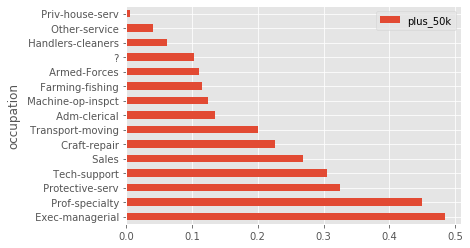

In [0]:
import matplotlib.pyplot as plt

# i like ggplot style
plt.style.use('ggplot')

# get simple plot on the pandas data
myplot = df_pandas.plot(kind='barh', x='occupation', y='plus_50k')

# display the plot (note - display() is a databricks function - 
# more info on plotting in Databricks is here: https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html)
display(myplot.figure)

###### summary statistics

You can also easily get summary stats on a Spark DataFrame like below. [Here](https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html) is a nice blog post that has more examples.<br><br>So this is an example of why you might want to move from Spark SQL into DataFrames API as being able to just call describe() on the Spark DF is easier then trying to do the equivilant in Spark SQL.

In [0]:
# describe df
#df_adult.select(df_adult['age'],df_adult['education_num']).describe().show()
df_adult.select('age', 'education_num').describe().show()

+-------+------------------+------------------+
summary| age| education_num|
+-------+------------------+------------------+
 count| 32560| 32560|
 mean|38.581633906633904| 10.08058968058968|
 stddev|13.640641827464002|2.5727089681052058|
 min| 17.0| 1.0|
 max| 90.0| 16.0|
+-------+------------------+------------------+